In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
from venn import venn
%matplotlib inline 

In [16]:
SomaLogic = pd.read_csv("~/Desktop/Knight Campus/ML Code/data.csv")
df = pd.read_csv("~/Desktop/Knight Campus/ML Code/data.csv")
SomaLogic = SomaLogic.fillna(0)
SomaLogic = SomaLogic.replace("X", 1)
df = df.fillna(0)
df = df.replace("X", 1)
SomaLogic

,SOMAmer SeqID,Target Name,Human Target or Analyte,UniProt ID,GeneID,Cardiovascular Disease,Inflammation and Immune Response,Metabolic Disease,Oncology,Combine Immune and Metabolic,...,Previous association with Sex,Drug Targets,Bone Related or of interest,NIHM Supplemental Data,Aging and Longevity pQTLs,Rat Cytokine/Chemokine Luminex,Known of Interest,Inflammatory Serum Protein Profiling of Patients,Count for Custom Panel,Unnamed: 20
0,18395-5,ADPRH,[Protein ADP-ribosylarginine] hydrolase,P54922,ADPRH,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5227-60,PDK1,[Pyruvate dehydrogenase (acetyl-transferring)]...,Q15118,PDK1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12651-21,PDK2,[Pyruvate dehydrogenase (acetyl-transferring)]...,Q15119,PDK2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22005-8,PDP1,[Pyruvate dehydrogenase [acetyl-transferring]]...,Q9P0J1,PDP1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12457-10,MTND,"1,2-dihydroxy-3-keto-5-methylthiopentene dioxy...",Q9BV57,ADI1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7283,5590-11,ZPLD1,Zona pellucida-like domain-containing protein 1,Q8TCW7,ZPLD1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7284,18286-3,ZWINT,ZW10 interactor,O95229,ZWINT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7285,8219-14,ZG16,Zymogen granule membrane protein 16,O60844,ZG16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7286,8310-6,U773,Zymogen granule protein 16 homolog B,Q96DA0,ZG16B,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
SomaLogic.columns

Index(['SOMAmer SeqID', 'Target Name', 'Human Target or Analyte', 'UniProt ID',
       'GeneID', 'Cardiovascular Disease', 'Inflammation and Immune Response',
       'Metabolic Disease', 'Oncology', 'Combine Immune and Metabolic',
       'Previous association with age', 'Previous association with Sex',
       'Drug Targets', 'Bone Related or of interest', 'NIHM Supplemental Data',
       'Aging and Longevity pQTLs', 'Rat Cytokine/Chemokine Luminex',
       'Known of Interest', 'Inflammatory Serum Protein Profiling of Patients',
       'Count for Custom Panel', 'Unnamed: 20'],
      dtype='object')

In [18]:
def label_combined(row):
    if row['Inflammation and Immune Response'] == 1 and row["Metabolic Disease"] == 1:
        return 1
    return 0

def combine(row):
    if row["Combined"] == 1 or row["NIHM Supplemental Data"] == 1:
        return 1
    return 0

def custom(row):
    if row["sum"] > 0:
        return 1
    return 0

In [19]:
SomaLogic["Combined"] = SomaLogic.apply(lambda row: label_combined(row), axis = 1)
SomaLogic["Combined_2"] = SomaLogic.apply(lambda row: combine(row), axis = 1)
SomaLogic = SomaLogic.drop(columns = ["Cardiovascular Disease", "Inflammation and Immune Response", "Metabolic Disease", "Oncology", "Count for Custom Panel", "Combine Immune and Metabolic"])
SomaLogic["sum"] = SomaLogic.sum(axis = 1)

/var/folders/8d/pc31fj4s1mz4ylkrm72k7yy40000gn/T/ipykernel_55746/1113634913.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  SomaLogic["sum"] = SomaLogic.sum(axis = 1)


In [20]:
SomaLogic["Custom Count"] = SomaLogic.apply(lambda row: custom(row), axis = 1)

In [21]:
SomaLogic[SomaLogic["Custom Count"] == 1]

,SOMAmer SeqID,Target Name,Human Target or Analyte,UniProt ID,GeneID,Previous association with age,Previous association with Sex,Drug Targets,Bone Related or of interest,NIHM Supplemental Data,Aging and Longevity pQTLs,Rat Cytokine/Chemokine Luminex,Known of Interest,Inflammatory Serum Protein Profiling of Patients,Unnamed: 20,Combined,Combined_2,sum,Custom Count
9,14157-21,14-3-3E,14-3-3 protein epsilon,P62258,YWHAE,0,0,0,0,1,0,0,1,0,1,0,1,4,1
14,4829-43,STRATIFIN,14-3-3 protein sigma,P31947,SFN,0,0,0,0,1,0,0,1,0,1,0,1,4,1
15,7625-27,14-3-3 protein theta,14-3-3 protein theta,P27348,YWHAQ,0,0,0,0,1,0,0,1,0,1,0,1,4,1
16,5858-6,14-3-3 protein zeta/delta,14-3-3 protein zeta/delta,P63104,YWHAZ,0,0,0,0,1,0,0,1,0,1,0,1,4,1
23,4563-61,PLCG1,"1-phosphatidylinositol 4,5-bisphosphate phosph...",P19174,PLCG1,0,0,0,0,1,0,0,1,0,1,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,3235-50,WFKN2,"WAP, Kazal, immunoglobulin, Kunitz and NTR dom...",Q8TEU8,WFIKKN2,0,0,0,0,1,0,0,1,0,1,0,1,4,1
7208,16070-7,WIF-1,Wnt inhibitory factor 1,Q9Y5W5,WIF1,0,0,0,0,1,0,0,1,0,1,0,1,4,1
7209,2848-2,WIF-1,Wnt inhibitory factor 1,Q9Y5W5,WIF1,0,0,0,0,1,0,0,1,0,1,0,1,4,1
7213,5927-4,WISP-3,WNT1-inducible-signaling pathway protein 3,O95389,CCN6,0,0,0,0,1,0,0,1,0,1,0,1,4,1


In [22]:
bone = set(SomaLogic[SomaLogic["NIHM Supplemental Data"] == 1]["SOMAmer SeqID"].values)
aging = set(SomaLogic[SomaLogic["Aging and Longevity pQTLs"] == 1]["SOMAmer SeqID"].values)
drug_target = set(SomaLogic[SomaLogic["Drug Targets"] == 1]["SOMAmer SeqID"].values)
metabolic = set(df[df["Metabolic Disease"] == 1]["SOMAmer SeqID"].values)
immune = set(df[df["Inflammation and Immune Response"] == 1]["SOMAmer SeqID"].values)
age = set(df[df["Previous association with age"] == 1]["SOMAmer SeqID"].values)
sex = set(df[df["Previous association with Sex"] == 1]["SOMAmer SeqID"].values)
interest = set(df[df["Bone Related or of interest"] == 1]["SOMAmer SeqID"].values)
luminex = set(df[df["Rat Cytokine/Chemokine Luminex"] == 1]["SOMAmer SeqID"].values)
inflammatory = set(df[df["Inflammatory Serum Protein Profiling of Patients"] == 1]["SOMAmer SeqID"].values)
combined = set(SomaLogic[SomaLogic["Combined"] == 1]["SOMAmer SeqID"].values)
combined_2 = set(SomaLogic[SomaLogic["Combined_2"] == 1]["SOMAmer SeqID"].values)

1327


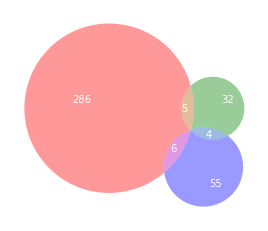

In [30]:
venn3([combined, sex, age], ('Metabolic', 'sex', "age"))
print(len(combined_2))

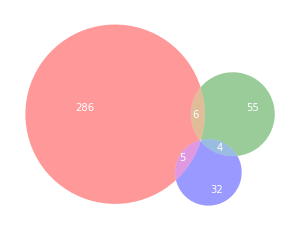

In [24]:
venn3([combined, age, sex], ('Combined', 'Age', 'Sex'))

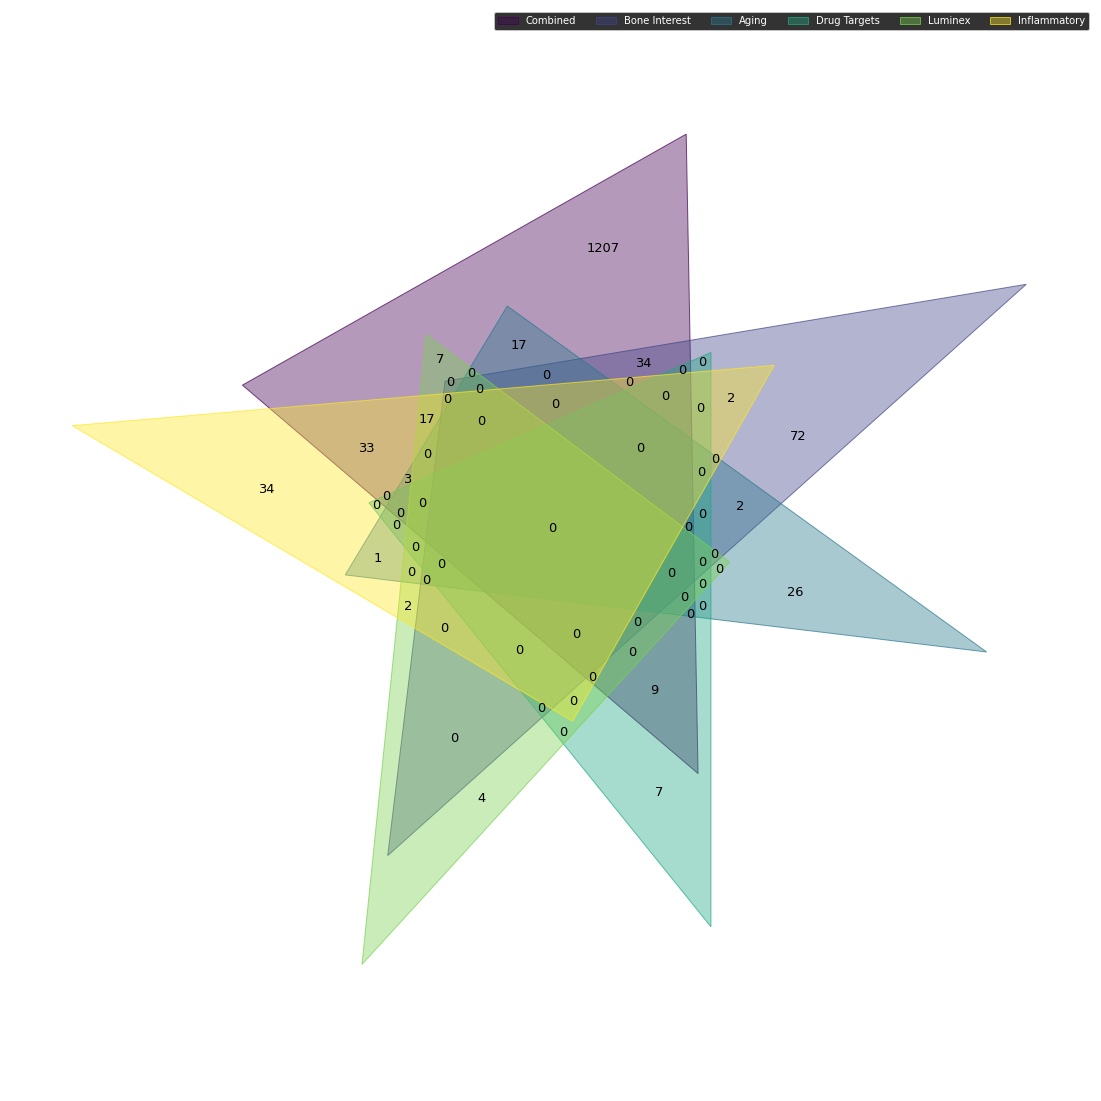

In [25]:
Labels = ["Combined", "Bone Interest", "Aging", "Drug Targets", "Luminex", "Inflammatory"]
sets = {
    Labels[0]: combined_2,
    Labels[1]: interest,
    Labels[2]: aging,
    Labels[3]: drug_target,
    Labels[4]: luminex,
    Labels[5]: inflammatory
}

fig, ax = plt.subplots(1, figsize = (25, 20))
venn(sets, ax = ax)
plt.legend(Labels, ncol = 6)

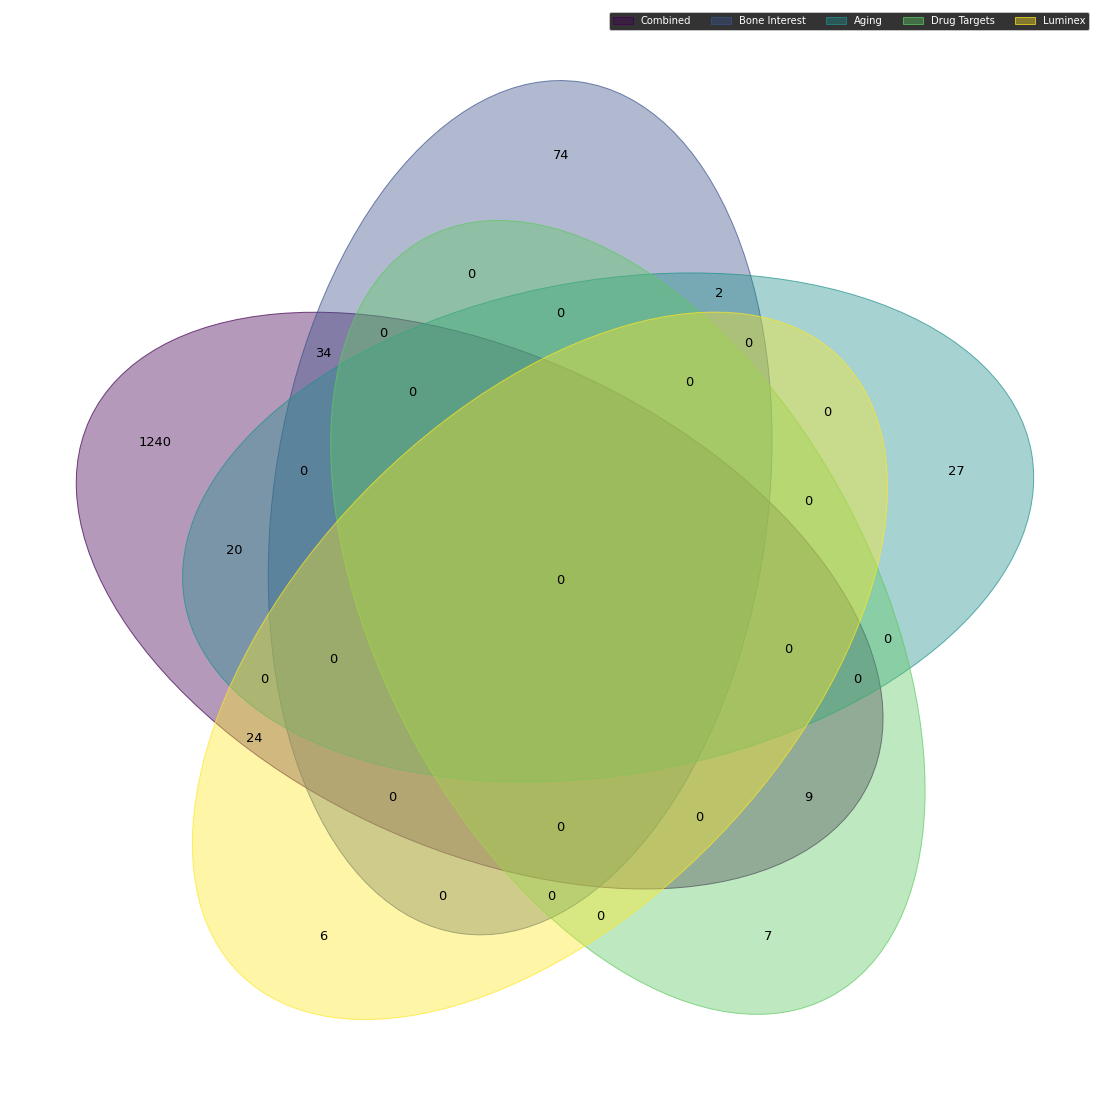

In [26]:
Labels = ["Combined", "Bone Interest", "Aging", "Drug Targets", "Luminex", "Inflammatory"]
sets = {
    Labels[0]: combined_2,
    Labels[1]: interest,
    Labels[2]: aging,
    Labels[3]: drug_target,
    Labels[4]: luminex,
}

fig, ax = plt.subplots(1, figsize = (25, 20))
venn(sets, ax = ax)
plt.legend(Labels, ncol = 6)